##Embedded Systems Course Project (Task ES16)

Submitted by -

Adrika Kunjumon (B21EE003)

Varsha Balamurali (B21EE074)

## Import Modules & Libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Input
import os
import cv2
from tensorflow.keras.preprocessing.image import img_to_array
from google.colab import drive

## Load the Dataset

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
img_height = 512
img_width = 768
data_dir = '/content/drive/MyDrive/kodak'

# Function to load and preprocess images
def load_and_preprocess_images(data_dir, img_height, img_width):
    image_data = []
    for filename in os.listdir(data_dir):
        img_path = os.path.join(data_dir, filename)

        img = cv2.imread(img_path)
        # Resize the image to fit into the specified format
        if img.shape[0] != img_height or img.shape[1] != img_width:

            img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)

        # Convert image to array
        img_array = img_to_array(img)
        # Normalize pixel values to [0,1]
        img_array = img_array / 255.0
        image_data.append(img_array[:,:,::-1])
    return np.array(image_data)

# Load and preprocess images
x_train = load_and_preprocess_images(data_dir, img_height, img_width)

print("Shape of x_train:", x_train.shape)

Shape of x_train: (24, 512, 768, 3)


## Exploratory Data Analysis

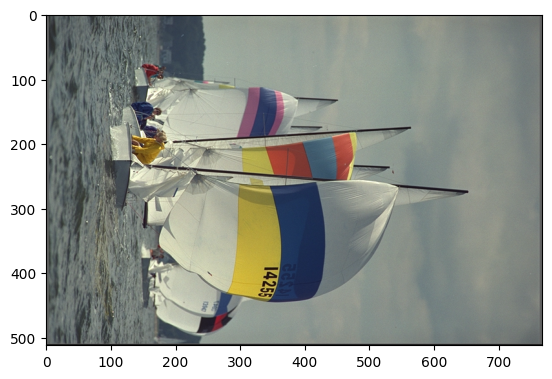

In [4]:
# randomly select input image
index = np.random.randint(len(x_train))
# plot the image
plt.imshow(x_train[index])
plt.gray()
plt.show()

## Model Creation

In [5]:
input_shape = (512, 768, 3)

# Encoder model
encoder_input = Input(shape=input_shape)
encoder_output1 = Conv2D(8, 3, use_bias=True, activation='leaky_relu', padding='same')(encoder_input)

encoder_output2 = MaxPooling2D(2, padding='same')(encoder_output1)
encoder_output2 = Conv2D(16, 3, use_bias=True, activation='leaky_relu', padding='same')(encoder_output2)

encoder_output3 = MaxPooling2D(2, padding='same')(encoder_output2)
encoder_output3 = Conv2D(32, 3, use_bias=True, activation='leaky_relu', padding='same')(encoder_output3)

encoder_output4 = MaxPooling2D(2, padding='same')(encoder_output3)
encoder_output5 = Conv2D(64, 3, use_bias=True, activation='leaky_relu', padding='same')(encoder_output4)

# Decoder model
decoder_output1 = Conv2D(32, 3, use_bias=True, activation='leaky_relu', padding='same')(encoder_output5)
decoder_output1 = UpSampling2D(2)(decoder_output1)
decoder_output1 = Concatenate()([encoder_output3, decoder_output1])

decoder_output2 = Conv2D(16, 3, use_bias=True, activation='leaky_relu', padding='same')(decoder_output1)
decoder_output2 = UpSampling2D(2)(decoder_output2)
decoder_output2 = Concatenate()([encoder_output2, decoder_output2])

decoder_output3= Conv2D(8, 3, use_bias=True, activation='leaky_relu', padding='same')(decoder_output2)
decoder_output3 = UpSampling2D(2)(decoder_output3)
decoder_output3 = Concatenate()([encoder_output1, decoder_output3])

decoder_output3 = Conv2D(3, 3, use_bias=True, activation='sigmoid', padding='same')(decoder_output3)

autoencoder_model = Model(encoder_input, decoder_output3, name='autoencoder')

# Compile the autoencoder model
autoencoder_model.compile(optimizer='adam', loss='mae')

# Display model summary
autoencoder_model.summary()


Model: "autoencoder"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 512, 768, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 512, 768, 8)          224       ['input_1[0][0]']             
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 256, 384, 8)          0         ['conv2d[0][0]']              
 D)                                                                                               
                                                                                                  
 conv2d_1 (Conv2D)           (None, 256, 384, 16)         1168      ['max_pooling2d[0][0

Epoch 1/300
1/1 [==============================] - 1s 935ms/step - loss: 0.1601 - val_loss: 0.1517
Epoch 2/300
1/1 [==============================] - 1s 641ms/step - loss: 0.1517 - val_loss: 0.1428
Epoch 3/300
1/1 [==============================] - 1s 645ms/step - loss: 0.1428 - val_loss: 0.1352
Epoch 4/300
1/1 [==============================] - 1s 642ms/step - loss: 0.1352 - val_loss: 0.1302
Epoch 5/300
1/1 [==============================] - 1s 677ms/step - loss: 0.1302 - val_loss: 0.1457
Epoch 6/300
1/1 [==============================] - 1s 668ms/step - loss: 0.1457 - val_loss: 0.1432
Epoch 7/300
1/1 [==============================] - 1s 662ms/step - loss: 0.1432 - val_loss: 0.1348
Epoch 8/300
1/1 [==============================] - 1s 671ms/step - loss: 0.1348 - val_loss: 0.1312
Epoch 9/300
1/1 [==============================] - 1s 823ms/step - loss: 0.1312 - val_loss: 0.1224
Epoch 10/300
1/1 [==============================] - 2s 2s/step - loss: 0.1224 - val_loss: 0.1258
Epoch 11/300

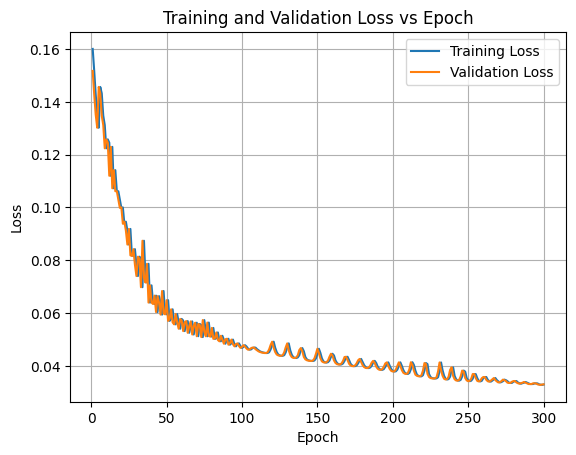

  adding: Compression_DL_model/ (stored 0%)
  adding: Compression_DL_model/variables/ (stored 0%)
  adding: Compression_DL_model/variables/variables.index (deflated 67%)
  adding: Compression_DL_model/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: Compression_DL_model/keras_metadata.pb (deflated 94%)
  adding: Compression_DL_model/saved_model.pb (deflated 89%)
  adding: Compression_DL_model/fingerprint.pb (stored 0%)
  adding: Compression_DL_model/assets/ (stored 0%)


In [9]:
# train the model
history = autoencoder_model.fit(x_train, x_train, epochs=300, validation_data=(x_train, x_train))

# Extract the loss values from the history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the loss vs epoch
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss vs Epoch')
plt.legend()
plt.grid(True)
plt.show()

# Save the model with the trained weights to be used later
autoencoder_model.save("Compression_DL_model")
!zip -r ./Compression_DL_model.zip ./Compression_DL_model/

To load and train from saved model (if needed)

In [ ]:
# Skip this block if no need to train more
# Load the saved model
autoencoder_model = tf.keras.models.load_model("/content/drive/MyDrive/Compression_DL_model") # We have uploaded the model folder on drive

# Compile the model with the desired optimizer, loss function, and metrics
autoencoder_model.compile(optimizer='adam', loss='mae')

# Train the model for additional epochs
autoencoder_model.fit(x_train, x_train, epochs=200, validation_data=(x_train, x_train))
autoencoder_model.save("Compression_DL_model")
!zip -r ./Compression_DL_model.zip ./Compression_DL_model/

## Visualize the Results

In [10]:
# predict the results from model
pred = autoencoder_model.predict(x_train)

1/1 [==============================] - 0s 246ms/step


In [11]:
import warnings

# Ignore the warning
warnings.filterwarnings("ignore", category=UserWarning, message="Clipping input data to the valid range for imshow with RGB data")

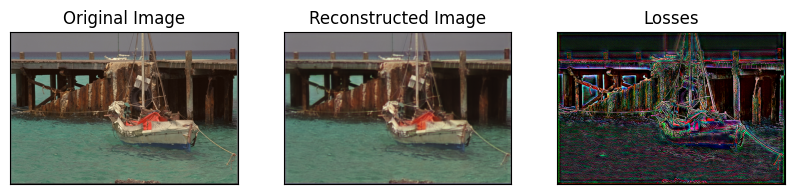

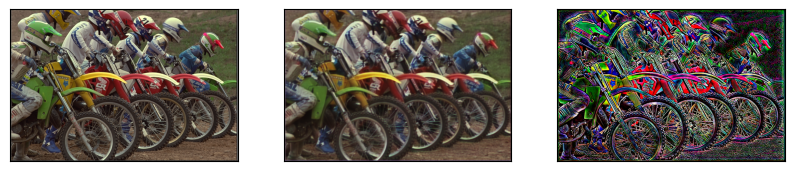

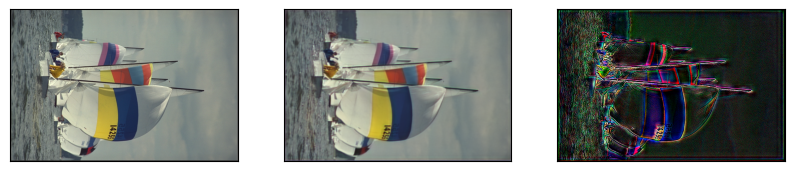

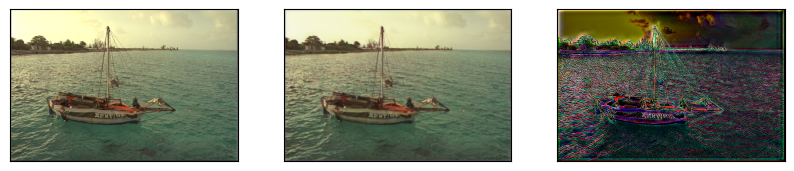

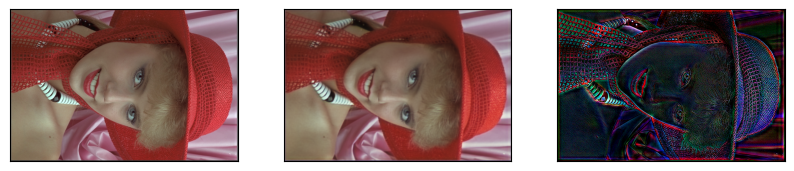

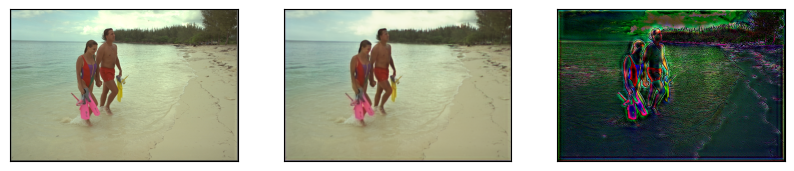

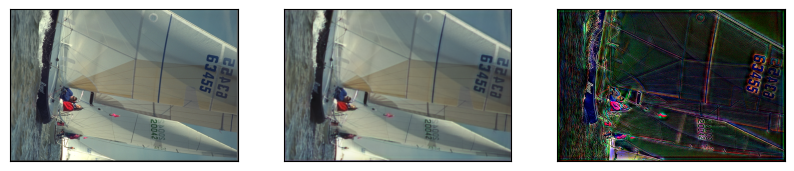

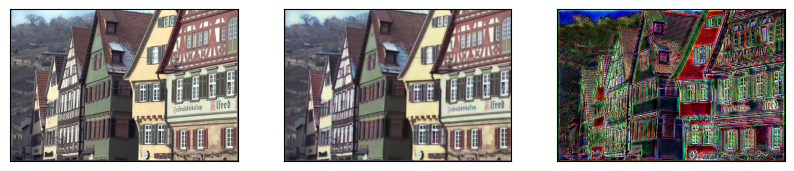

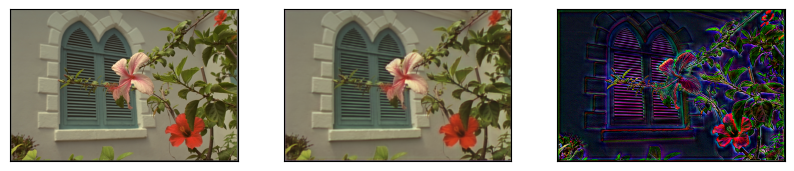

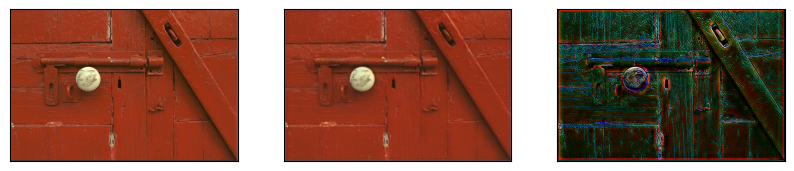

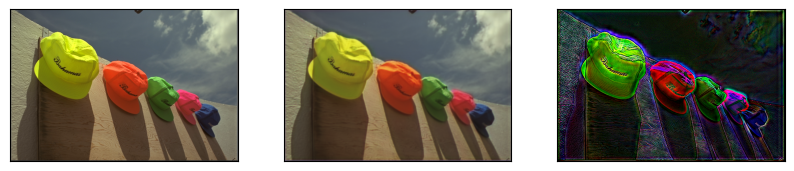

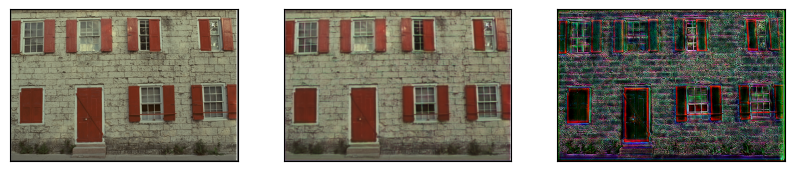

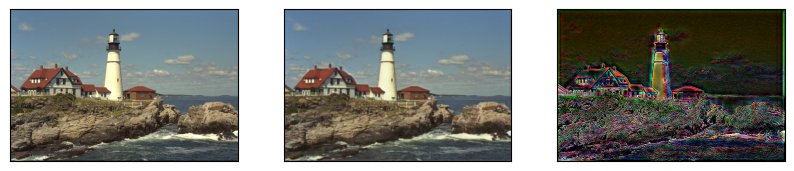

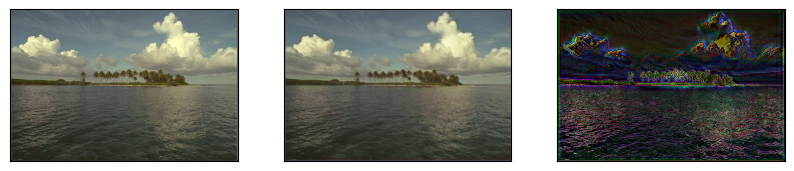

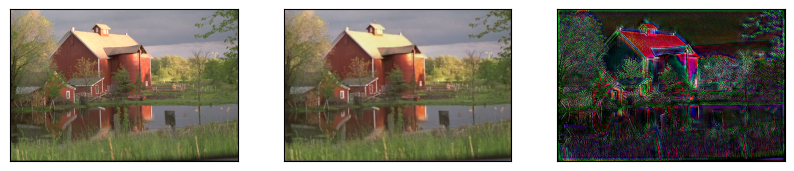

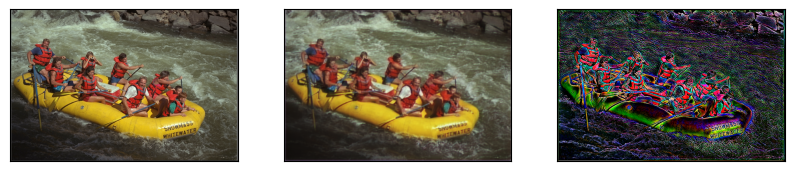

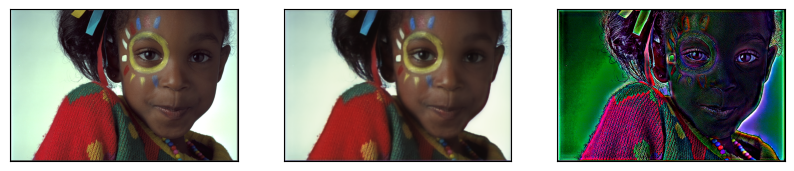

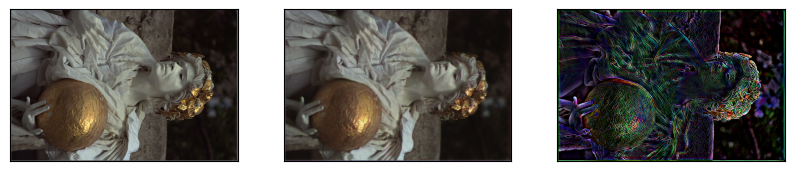

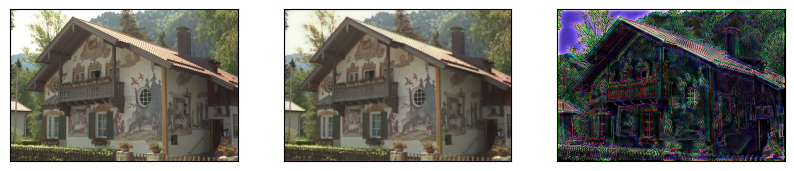

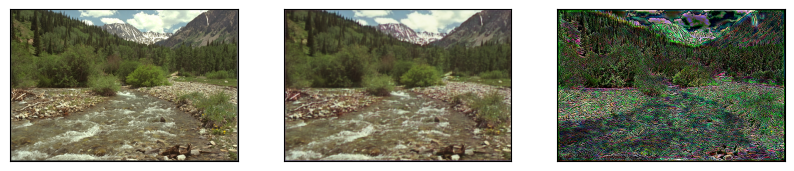

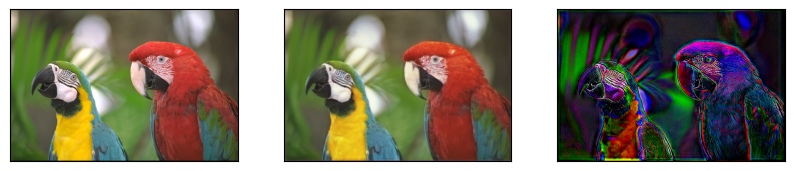

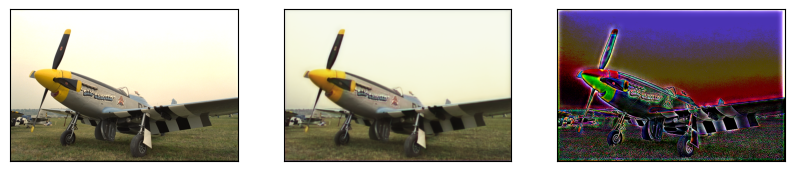

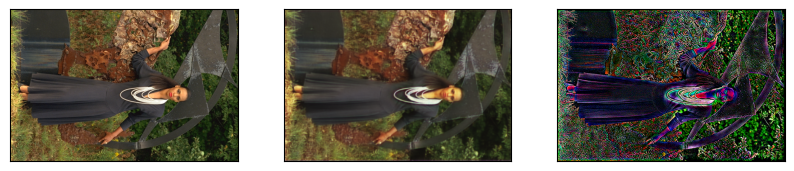

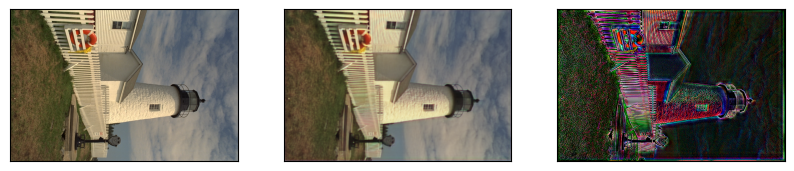

In [14]:
for i in range(0, len(x_train)):
  plt.figure(figsize=(10, 4))
  # display original image
  ax = plt.subplot(1, 3, 1)
  plt.imshow(x_train[i])
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  if i==0:
    # Set titles for each subplot
    ax.set_title('Original Image')

  # display compressed image
  ax = plt.subplot(1, 3, 2)
  plt.imshow(pred[i])
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  if i==0:
    ax.set_title('Reconstructed Image')

  ax = plt.subplot(1, 3, 3)
  # Here, scaling loss by 10 so its visible
  plt.imshow((x_train[i]-pred[i])*10)
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  if i==0:
    ax.set_title('Losses')
  plt.show()

##Comparing Compression Ratios

Block used to compress to JPEG format (folder saved to target_folder_path, needs to be run only once)

In [17]:
def convert_images_to_jpeg(folder_path,target_folder_path, quality=95):
    total_original_size = 0
    total_compressed_size = 0
    # Iterate over files in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tiff')):
            filepath = os.path.join(folder_path, filename)
            # Read the image
            img = cv2.imread(filepath)

            # Convert to JPEG with specified quality
            cv2.imwrite(os.path.join(target_folder_path, f"{filename.split('.')[0]}.jpg"), img, [int(cv2.IMWRITE_JPEG_QUALITY), quality])

folder_path = r"/content/drive/MyDrive/kodak"
jpeg_folder = r"/content/drive/MyDrive/kodak_jpeg" #please create this folder in drive first
convert_images_to_jpeg(folder_path, jpeg_folder, 50)

In [18]:
# We used https://products.aspose.app/imaging/image-compress/jpeg2000 to convert our dataset into the JPEG2000 format for
# comparison purposes

def compression_ratio_jpeg2000(folder_path, folder_path_jpeg2000):
    total_compression_ratio = 0
    # Iterate over files in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.j2k')):
            filepath = os.path.join(folder_path, filename)
            compressed_filepath = os.path.join(folder_path_jpeg2000, filename+'.j2k')
            original_size = os.path.getsize(filepath)
            compressed_size = os.path.getsize(compressed_filepath)
            compression_ratio = compressed_size/original_size
            total_compression_ratio+=compression_ratio
    return total_compression_ratio

def compression_ratio_jpeg(folder_path, folder_path_jpeg):
    total_compression_ratio = 0
    # Iterate over files in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tiff')):
            filepath = os.path.join(folder_path, filename)
            compressed_filepath = os.path.join(folder_path_jpeg, f"{filename.split('.')[0]}.jpg")
            original_size = os.path.getsize(filepath)
            compressed_size = os.path.getsize(compressed_filepath)
            compression_ratio = compressed_size/original_size
            total_compression_ratio+=compression_ratio
    return total_compression_ratio

folder_path = r"/content/drive/MyDrive/kodak"
jpeg_folder = r"/content/drive/MyDrive/kodak_jpeg"
total_compressed_ratio = compression_ratio_jpeg(folder_path, jpeg_folder)

# Calculate compression ratio
compression_ratio = total_compressed_ratio/24
print("Total Compression Ratio for JPEG :", compression_ratio)

jpeg_2000_folder=r"/content/drive/MyDrive/kodak_jpeg2000"
total_compressed_ratio_jpeg2000 = compression_ratio_jpeg2000(folder_path, jpeg_2000_folder)

# Calculate compression ratio
compression_ratio_jpeg2000 = total_compressed_ratio_jpeg2000/24
print("Total Compression Ratio for JPEG2000 :", compression_ratio_jpeg2000)

Total Compression Ratio for JPEG : 0.06818495219300054
Total Compression Ratio for JPEG2000 : 0.738248826700886


In [19]:
# Extract output from last layer of encoder submodel
encoder_model = Model(inputs=autoencoder_model.input, outputs=autoencoder_model.get_layer('conv2d_3').output) #have to give appropriate layer name

# Get the output from the specified layer
compressed_image = encoder_model.predict(x_train)
print(compressed_image.shape)  # Shape of the output from the encoder


1/1 [==============================] - 0s 169ms/step
(24, 64, 96, 64)


In [20]:
# Calculate Compression Rate for our Encoder Model
def calculate_compression_rate(compressed_images, original_images):
    num_bits_original = original_images.nbytes * 8  # Convert bytes to bits
    num_bits_compressed = compressed_images.nbytes * 8  # Convert bytes to bits
    compression_rate = num_bits_compressed / num_bits_original
    return compression_rate

# Example usage:
compression_rate = calculate_compression_rate(compressed_image, x_train)
print(compression_rate)

0.3333333333333333


Comparing PSNR and SSIM Metrics

In [29]:
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
from skimage import io
import imageio

# Initialize lists to store PSNR and SSIM scores
jpeg_psnr_scores = []
jpeg_ssim_scores = []
jpeg2000_psnr_scores = []
jpeg2000_ssim_scores = []
model_psnr_scores = []
model_ssim_scores = []

def scores_jpeg(folder_path, folder_path_jpeg):
    # Iterate over files in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tiff')):
            filepath = os.path.join(folder_path, filename)
            compressed_filepath = os.path.join(folder_path_jpeg, f"{filename.split('.')[0]}.jpg")
            # Calculate PSNR and SSIM scores and append to the lists
            test_image = imageio.imread(filepath)
            jpeg_compressed_image = imageio.imread(compressed_filepath)
            jpeg_psnr_scores.append(psnr(test_image, jpeg_compressed_image))
            jpeg_ssim_scores.append(ssim(test_image, jpeg_compressed_image, multichannel=True))

def scores_model(folder_path):
    # Iterate over files in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.j2k')):
            filepath = os.path.join(folder_path, filename)
            # Calculate PSNR and SSIM scores and append to the lists
            test_image = imageio.imread(filepath)
            if test_image.shape == (768, 512, 3): # rotating the image if necessary
                test_image = test_image.transpose((1, 0, 2))
            img = test_image.reshape(1,512,768,3)
            # Calculate PSNR and SSIM for learned model
            model_compressed_image = autoencoder_model.predict(img)
            model_compressed_image= model_compressed_image.reshape(512,768,3)
            model_psnr_scores.append(psnr(test_image, model_compressed_image))
            model_ssim_scores.append(ssim(test_image, model_compressed_image, multichannel=True))

#running the model to generate scores
scores_jpeg(folder_path, jpeg_folder)
scores_model(folder_path)

# Print the mean scores for each model
print("JPEG PSNR:", sum(jpeg_psnr_scores)/24)
print("JPEG SSIM:",  sum(jpeg_ssim_scores)/24)
print("Model PSNR:",  sum(model_psnr_scores)/24)
print("Model SSIM:",  sum(model_ssim_scores)/24)



<ipython-input-29-216fa23e0f47>:21: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  test_image = imageio.imread(filepath)
<ipython-input-29-216fa23e0f47>:22: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  jpeg_compressed_image = imageio.imread(compressed_filepath)
<ipython-input-29-216fa23e0f47>:24: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  jpeg_ssim_scores.append(ssim(test_image, jpeg_compressed_image, multichannel=True))


1/1 [==============================] - 0s 18ms/step


<ipython-input-29-216fa23e0f47>:32: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  test_image = imageio.imread(filepath)
<ipython-input-29-216fa23e0f47>:39: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  model_psnr_scores.append(psnr(test_image, model_compressed_image))
<ipython-input-29-216fa23e0f47>:40: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  model_ssim_scores.append(ssim(test_image, model_compressed_image, multichannel=True))
/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)


1/1 [==============================] - 0s 18ms/step
JPEG PSNR: 32.17381570095742
JPEG SSIM: 0.8996512307037356
Model PSNR: 6.8446512703570646
Model SSIM: 0.015735036672588267
